In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_TC/2.0/.4T+5A+5R+AR+AT+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FI+FR+G2+GB+GR+HK+HU+ID+IE+IL+IN+IT+JP+KR+LU+MX+MY+NL+NO+NZ+PL+PT+RU+SA+SE+SG+TH+TR+US+XM+ZA.H...770?format=csv"]
df = pd.concat([pd.read_csv(url) for url in urls])

In [3]:
unique_items = [
    'NZ', 'DE', 'GR', 'BR', 'TH', 'BE', 'TR', '5A', 'PL', 'NO', 'CZ', 'IT', 'KR', 
    'SG', 'HU', '5R', 'PT', 'IN', 'US', 'NL', 'LU', 'GB', 'ID', 'FI', 'SE', 'CL', 
    'IE', 'ZA', 'SA', 'MX', 'MY', 'FR', 'AR', 'AT', 'IL', 'CH', 'CN', 'ES', '4T', 
    'CO', 'CA', 'AU', 'G2', 'RU', 'DK', 'XM', 'HK', 'JP'
]
country_mapping = {
    'AL': 'Albania',
    'DZ': 'Algeria',
    'AR': 'Argentina',
    'AM': 'Armenia, Rep. of',
    'AU': 'Australia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan, Rep. of',
    'BS': 'Bahamas, The',
    'BY': 'Belarus, Rep. of',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BA': 'Bosnia and Herzegovina',
    'BW': 'Botswana',
    'BR': 'Brazil',
    'BN': 'Brunei Darussalam',
    'BG': 'Bulgaria',
    'CV': 'Cabo Verde',
    'CM': 'Cameroon',
    'CA': 'Canada',
    'CL': 'Chile',
    'HK': 'China, P.R.: Hong Kong',
    'MO': 'China, P.R.: Macao',
    'CN': 'China, P.R.: Mainland',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'HR': 'Croatia, Rep. of',
    'CY': 'Cyprus',
    'CZ': 'Czech Rep.',
    'DK': 'Denmark',
    'DO': 'Dominican Rep.',
    'EC': 'Ecuador',
    'EG': 'Egypt, Arab Rep. of',
    'SV': 'El Salvador',
    'EE': 'Estonia, Rep. of',
    'EA': 'Euro Area',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GH': 'Ghana',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IN': 'India',
    'ID': 'Indonesia',
    'IR': 'Iran, Islamic Rep. of',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JP': 'Japan',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan, Rep. of',
    'KE': 'Kenya',
    'KR': 'Korea, Rep. of',
    'XK': 'Kosovo, Rep. of',
    'KG': 'Kyrgyz Rep.',
    'LV': 'Latvia',
    'LS': 'Lesotho, Kingdom of',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MY': 'Malaysia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MD': 'Moldova, Rep. of',
    'MN': 'Mongolia',
    'ME': 'Montenegro',
    'NA': 'Namibia',
    'NL': 'Netherlands, The',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MK': 'North Macedonia, Republic of',
    'NO': 'Norway',
    'PY': 'Paraguay',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland, Rep. of',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'WS': 'Samoa',
    'SA': 'Saudi Arabia',
    'SN': 'Senegal',
    'RS': 'Serbia, Rep. of',
    'SC': 'Seychelles',
    'SG': 'Singapore',
    'SK': 'Slovak Rep.',
    'SI': 'Slovenia, Rep. of',
    'ZA': 'South Africa',
    'ES': 'Spain',
    'LK': 'Sri Lanka',
    'LC': 'St. Lucia',
    'VC': 'St. Vincent and the Grenadines',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TH': 'Thailand',
    'TT': 'Trinidad and Tobago',
    'TR': 'Türkiye, Rep of',
    'UG': 'Uganda',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'US': 'United States',
    'UY': 'Uruguay',
    'PS': 'West Bank and Gaza'
}

# Create a DataFrame from the unique items
df_unique = pd.DataFrame(unique_items, columns=['Code'])

# Map codes to countries
df_unique['Country'] = df_unique['Code'].map(country_mapping)

In [4]:
new_df = pd.merge(df, df_unique, left_on='BORROWERS_CTY', right_on='Code', how='left')

In [5]:
new_df = new_df.rename(columns={'OBS_VALUE': 'Household Debt'})

In [6]:
from datetime import datetime
def convert_quarter_to_start_datetime(quarter_str):
    year, quarter = quarter_str.split('-')
    year = int(year)
    quarter = int(quarter[1])  
    
    if quarter == 1:
        month = 1  # January
    elif quarter == 2:
        month = 4  # April
    elif quarter == 3:
        month = 7  # July
    elif quarter == 4:
        month = 10 # October

    return datetime(year, month, 1)

# Replace the 'TIME_PERIOD' column with the start dates
new_df['TIME_PERIOD'] = new_df['TIME_PERIOD'].apply(convert_quarter_to_start_datetime)

In [7]:
new_df= new_df[new_df['Country'].notna()]


In [8]:
new_df = new_df[['Country', 'TIME_PERIOD', 'Household Debt']]

In [9]:
countries = [
    'Saudi Arabia', 'Finland', 'South Africa', 'Chile', 'China, P.R.: Mainland',
    'Russian Federation', 'France', 'Mexico', 'Ireland', 'Argentina',
    'Netherlands, The', 'United States', 'India', 'Sweden', 'Austria',
    'Indonesia', 'Germany', 'Luxembourg', 'Portugal', 'Brazil', 'Thailand',
    'Greece', 'New Zealand', 'Italy', 'Japan', 'Norway', 'China, P.R.: Hong Kong',
    'United Kingdom', 'Denmark', 'Singapore', 'Belgium', 'Poland, Rep. of',
    'Czech Rep.', 'Türkiye, Rep of', 'Hungary', 'Canada', 'Colombia',
    'Korea, Rep. of', 'Australia', 'Spain', 'Switzerland', 'Malaysia', 'Israel'
]

advanced_economies = [
    'Australia', 'Canada', 'Denmark', 'Japan', 'New Zealand', 'Norway', 
    'Sweden', 'Switzerland', 'United Kingdom', 'United States', 'Italy', 'Spain', 'Belgium', 'Finland',
    'Netherlands, The', 'Germany', 'Luxembourg', 'Portugal', 'Austria', 'France', 'Greece', 'Ireland'
]

asian_emerging_market_economies = [
    'China, P.R.: Mainland', 'Indonesia', 'China, P.R.: Hong Kong','Malaysia', 
    'Korea, Rep. of', 'Thailand', 'Singapore', 'India',
]
emerging_market_economies = [
    'Argentina', 'Brazil', 'Chile', 'Colombia', 'Czech Rep.',
    'Hungary',  'Israel', 'Mexico', 'Poland, Rep. of', 'Russian Federation', 'Saudi Arabia',
    'South Africa',  'Türkiye, Rep of'
]

print(len(countries), len(advanced_economies), len(emerging_market_economies))

43 22 13


In [10]:
def categorize_country(country):
    if country in advanced_economies:
        return 'Advanced Economy'
    elif country in emerging_market_economies:
        return 'Emerging Economy'
    elif country in asian_emerging_market_economies:
        return 'Emerging Asian Economy'
    else:
        return 'Other'

new_df['Category'] = new_df['Country'].apply(categorize_country)

# Sort by category
sorted_df = new_df.sort_values(by='Category')

In [11]:
emerging = sorted_df[sorted_df['Category'] == 'Emerging Economy']
emerging = emerging.sort_values(by='TIME_PERIOD')

asian_emerging = sorted_df[sorted_df['Category'] == 'Emerging Asian Economy']
asian_emerging = asian_emerging.sort_values(by='TIME_PERIOD')

advanced = sorted_df[sorted_df['Category'] == 'Advanced Economy']
advanced = advanced.sort_values(by='TIME_PERIOD')


In [12]:
def set_quantiles(data):
    for time_period in data['TIME_PERIOD'].unique():
        data.loc[data['TIME_PERIOD'] == time_period, 'p10'] = data[data['TIME_PERIOD'] == time_period]['Household Debt'].quantile(0.1)
        data.loc[data['TIME_PERIOD'] == time_period, 'p25'] = data[data['TIME_PERIOD'] == time_period]['Household Debt'].quantile(0.25)
        data.loc[data['TIME_PERIOD'] == time_period, 'p75'] = data[data['TIME_PERIOD'] == time_period]['Household Debt'].quantile(0.75)
        data.loc[data['TIME_PERIOD'] == time_period, 'p90'] = data[data['TIME_PERIOD'] == time_period]['Household Debt'].quantile(0.9)
        data.loc[data['TIME_PERIOD'] == time_period, 'median'] = data[data['TIME_PERIOD'] == time_period]['Household Debt'].median()
    return data


emerging_copy = emerging.copy()
emerging_copy = set_quantiles(emerging_copy)
emerging_copy = emerging_copy[emerging_copy['Country'] == 'Hungary']

asian_emerging_copy = asian_emerging.copy()
asian_emerging_copy = set_quantiles(asian_emerging_copy)
asian_emerging_copy = asian_emerging_copy[asian_emerging_copy['Country']== 'Korea, Rep. of']

advanced_copy = advanced.copy()
advanced_copy= set_quantiles(advanced_copy)
advanced_copy= advanced_copy[advanced_copy['Country']== 'United States']

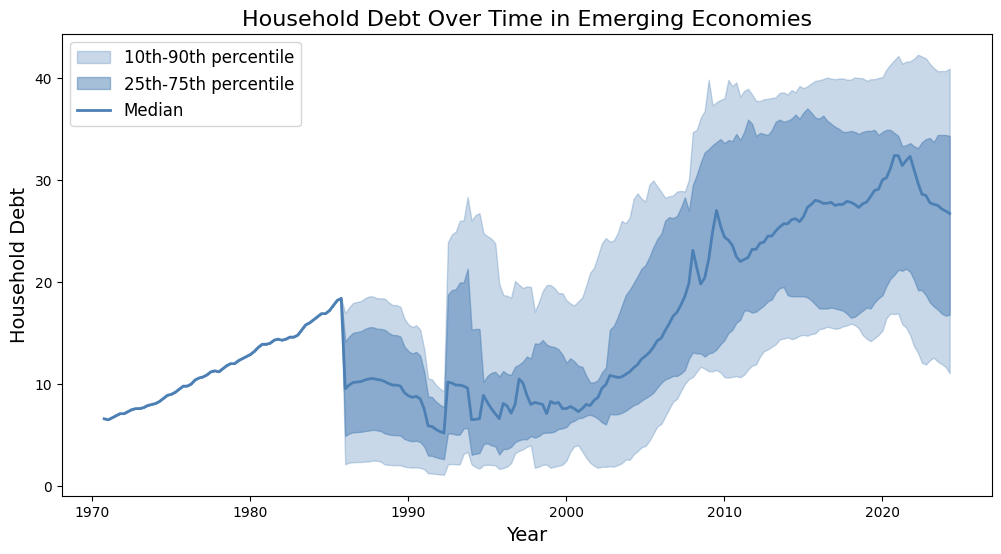

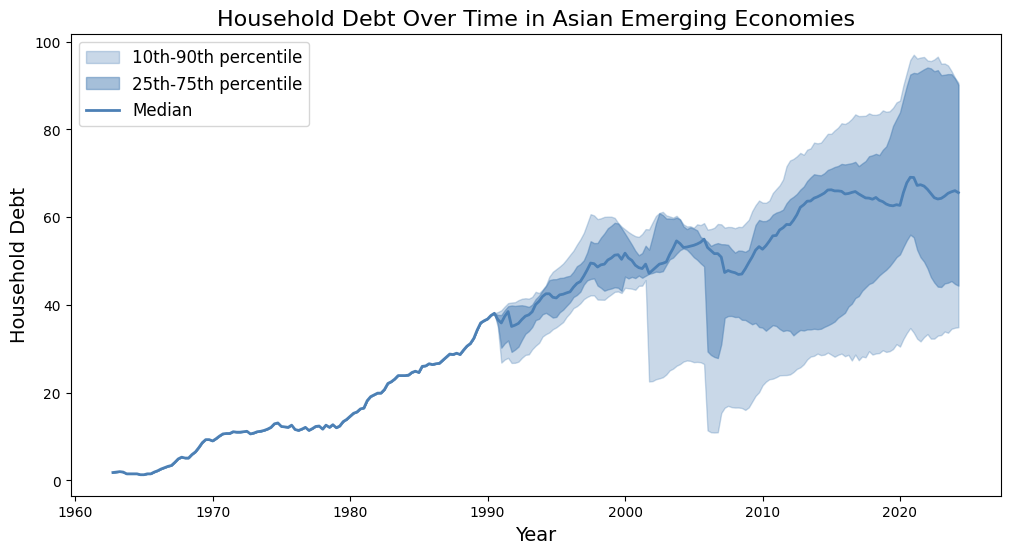

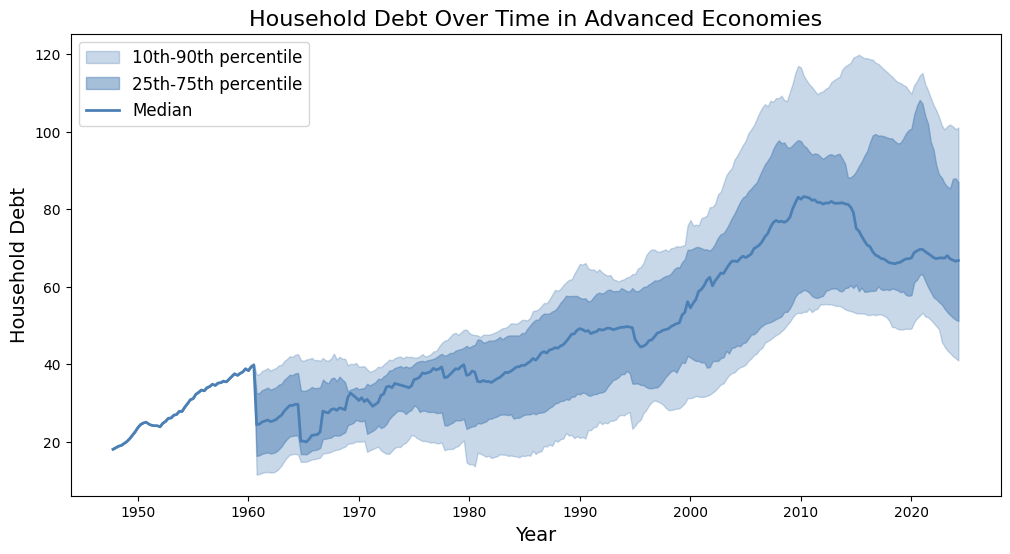

In [13]:
def plot_quantiles(df, title):
    base_color = '#4C80B5'
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.fill_between(df['TIME_PERIOD'], df['p10'], df['p90'], color=base_color, alpha=0.3, label='10th-90th percentile')
    ax.fill_between(df['TIME_PERIOD'], df['p25'], df['p75'], color=base_color, alpha=0.5, label='25th-75th percentile')
    ax.plot(df['TIME_PERIOD'], df['median'], color=base_color, linewidth=2, label='Median')
    
    ax.set_title(f'Household Debt Over Time in {title}', fontsize=16)
    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Household Debt', fontsize=14)
    ax.legend(loc='upper left', fontsize=12)
    plt.show()

    

plot_quantiles(emerging_copy, 'Emerging Economies')

plot_quantiles(asian_emerging_copy, 'Asian Emerging Economies')

plot_quantiles(advanced_copy, 'Advanced Economies')


In [15]:
asian_emerging_copy['Country'].unique()

array(['Korea, Rep. of'], dtype=object)

In [20]:
emerging

,Country,TIME_PERIOD,Household Debt,Category
5278,Hungary,1970-10-01,6.6,Emerging Economy
5279,Hungary,1971-01-01,6.5,Emerging Economy
5280,Hungary,1971-04-01,6.7,Emerging Economy
5281,Hungary,1971-07-01,6.9,Emerging Economy
5282,Hungary,1971-10-01,7.1,Emerging Economy
...,...,...,...,...
5123,Czech Rep.,2024-04-01,30.7,Emerging Economy
755,Russian Federation,2024-04-01,22.5,Emerging Economy
5008,"Poland, Rep. of",2024-04-01,23.4,Emerging Economy
473,Chile,2024-04-01,46.0,Emerging Economy
